# 1. Formulate / Outline the problem: weather prediction

![](https://carpentries-incubator.github.io/deep-learning-intro/fig/03_weather_prediction_dataset_map.png)

## 2. Identify inputs and outputs

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("https://zenodo.org/record/5071376/files/weather_prediction_dataset_light.csv?download=1")


In [3]:
data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-15.2,-17.0,-13.4,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,-13.7,-15.0,-12.3,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-9.2,-12.5,-5.8,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,-5.6,-7.0,-4.2,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-7.6,-9.4,-5.8,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [4]:
data.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max',
       'DE_BILT_cloud_cover', 'DE_BILT_humidity', 'DE_BILT_pressure',
       'DE_BILT_global_radiation', 'DE_BILT_precipitation', 'DE_BILT_sunshine',
       'DE_BILT_temp_mean', 'DE_BILT_temp_min', 'DE_BILT_temp_max',
       'DRESDEN_cloud_cover', 'DRESDEN_humidity', 'DRESDEN_global_radiation',
       'DRESDEN_precipitation', 'DRESDEN_sunshine', 'DRESDEN_temp_mean',
       'DRESDEN_temp_min', 'DRESDEN_temp_max', 'DUSSELDORF_cloud_cover',
       'DUSSELDORF_humidity', 'DUSSELDORF_pressure',
       'DUSSELDORF_global_radiation', 'DUSSELDORF_precipitation',
       'DUSSELDORF_sunshine', 'DUSSELDORF_temp_mean', 'DUSSELDORF_temp_min',
       'DUSSELDORF_temp_max', 'HEATHROW_cloud_cover', 'HEATHROW_humidity',
       'HEATHROW_pressure', 'HEATHROW_global_radiation',
       'HEATH

In [5]:
data.shape

(3654, 91)

## 3. Prepare data

In [6]:
nr_rows = 365*3 # 3 years

# data
X_data = data.loc[:nr_rows]
X_data = X_data.drop(columns=['DATE', 'MONTH']) # Drop date and month columns

y_data = data.loc[1:(nr_rows + 1)]["BASEL_sunshine"]

In [7]:
# Split data and labels into training, validation and test set

from sklearn.model_selection import train_test_split

X_train, X_holdout, y_train, y_holdout = train_test_split(X_data, y_data, test_size=0.3, random_state=0)

In [8]:
X_val, X_test, y_val, y_test = train_test_split(X_holdout, y_holdout, test_size=0.5, random_state=0)

## 4. Choose a pretrained model or start building architecture from scratch

In [9]:
from tensorflow import keras

In [10]:
def create_nn():
    # Input layer
    inputs = keras.Input(shape=X_data.shape[1], name='input')

    # Hidden layers
    layers_dense = keras.layers.Dense(100, 'relu')(inputs)
    layers_dense = keras.layers.Dense(50, 'relu')(layers_dense)

    # Output layer
    outputs = keras.layers.Dense(1)(layers_dense)

    return keras.Model(inputs=inputs, outputs=outputs, name="weather_prediction_model")

In [11]:
model = create_nn()

In [12]:
model.summary()

Model: "weather_prediction_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 89)]              0         
                                                                 
 dense (Dense)               (None, 100)               9000      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 14101 (55.08 KB)
Trainable params: 14101 (55.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


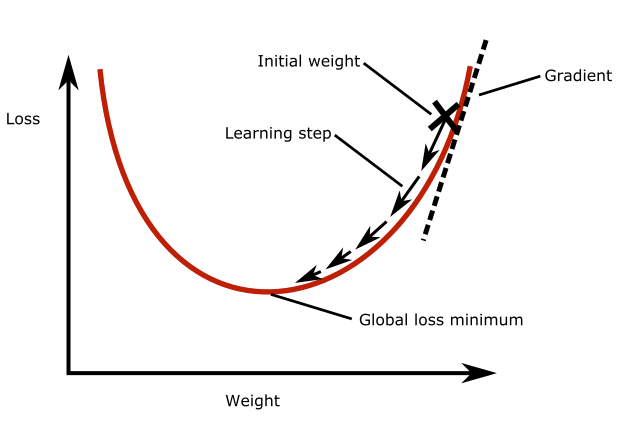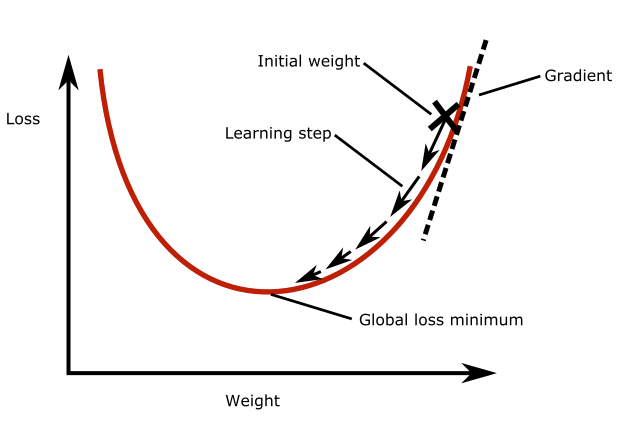

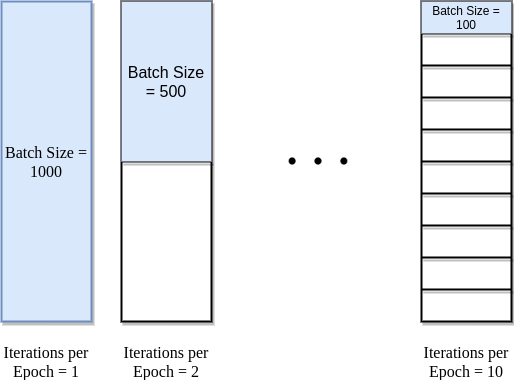

## 5. Choose a loss function and optimizer

In [13]:
model.compile(loss='mse',
              optimizer='adam',
              metrics=[keras.metrics.RootMeanSquaredError()])

In [14]:
def compile_model(model):
    model.compile(loss='mse',
              optimizer='adam',
              metrics=[keras.metrics.RootMeanSquaredError()])

In [15]:
compile_model(model)

## 6. Train the model

In [16]:
X_train.shape[0] / 32

23.96875

In [17]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=200,
                    verbose=2)

Epoch 1/200
24/24 - 0s - loss: 30.1896 - root_mean_squared_error: 5.4945 - 151ms/epoch - 6ms/step
Epoch 2/200
24/24 - 0s - loss: 14.0203 - root_mean_squared_error: 3.7444 - 13ms/epoch - 557us/step
Epoch 3/200
24/24 - 0s - loss: 12.9417 - root_mean_squared_error: 3.5975 - 13ms/epoch - 536us/step
Epoch 4/200
24/24 - 0s - loss: 12.0390 - root_mean_squared_error: 3.4697 - 14ms/epoch - 565us/step
Epoch 5/200
24/24 - 0s - loss: 11.6152 - root_mean_squared_error: 3.4081 - 14ms/epoch - 598us/step
Epoch 6/200
24/24 - 0s - loss: 11.3870 - root_mean_squared_error: 3.3745 - 14ms/epoch - 584us/step
Epoch 7/200
24/24 - 0s - loss: 11.2137 - root_mean_squared_error: 3.3487 - 16ms/epoch - 654us/step
Epoch 8/200
24/24 - 0s - loss: 11.4592 - root_mean_squared_error: 3.3851 - 15ms/epoch - 635us/step
Epoch 9/200
24/24 - 0s - loss: 10.8401 - root_mean_squared_error: 3.2924 - 16ms/epoch - 649us/step
Epoch 10/200
24/24 - 0s - loss: 10.5875 - root_mean_squared_error: 3.2538 - 15ms/epoch - 609us/step
Epoch 11/2

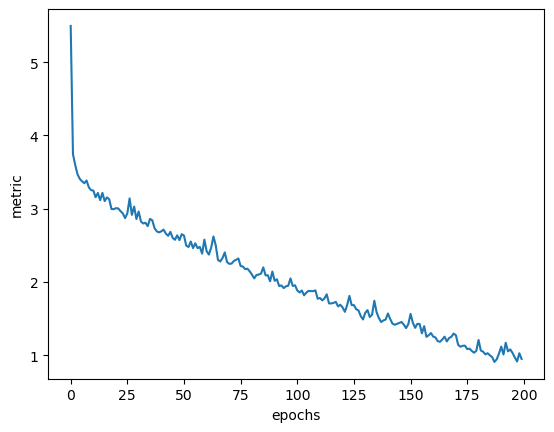

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_history(history, metrics):
    history_df = pd.DataFrame.from_dict(history.history)
    sns.lineplot(data=history_df[metrics])
    plt.xlabel("epochs")
    plt.ylabel("metric")

plot_history(history, 'root_mean_squared_error')

## 7. Perform a prediciton

In [19]:
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

6/6 [==============================] - 0s 506us/step


## 8. Measure performance

In [20]:
# We define a function that we will reuse in this lesson
def plot_predictions(y_pred, y_true, title):
    plt.style.use('ggplot')  # optional, that's only to define a visual style
    plt.scatter(y_pred, y_true, s=10, alpha=0.5)
    plt.xlabel("predicted sunshine hours")
    plt.ylabel("true sunshine hours")
    plt.title(title)

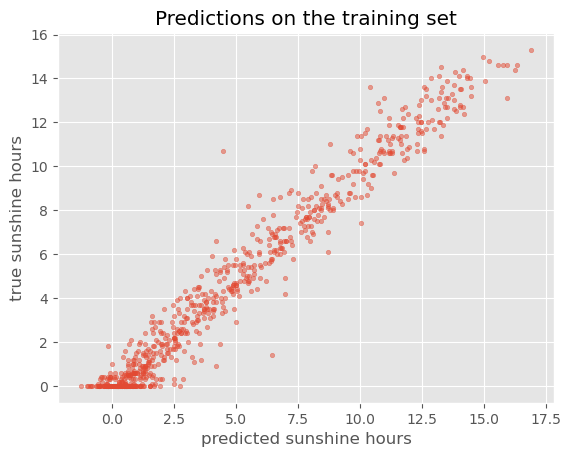

In [21]:
plot_predictions(y_train_predicted, y_train, 
                 title='Predictions on the training set')

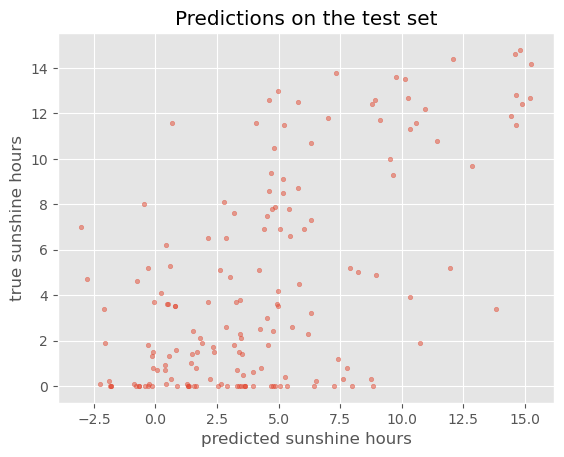

In [22]:
plot_predictions(y_test_predicted, y_test, 
                 title='Predictions on the test set')

In [24]:
train_metrics = model.evaluate(X_train, y_train, return_dict=True)
train_metrics

24/24 [==============================] - 0s 486us/step - loss: 0.7794 - root_mean_squared_error: 0.8829


{'loss': 0.779431939125061, 'root_mean_squared_error': 0.8828544020652771}

In [25]:
test_metrics = model.evaluate(X_test, y_test, return_dict=True)
test_metrics

6/6 [==============================] - 0s 858us/step - loss: 15.1823 - root_mean_squared_error: 3.8964


{'loss': 15.182305335998535, 'root_mean_squared_error': 3.8964478969573975}

In [26]:
y_baseline_prediction = X_test['BASEL_sunshine']

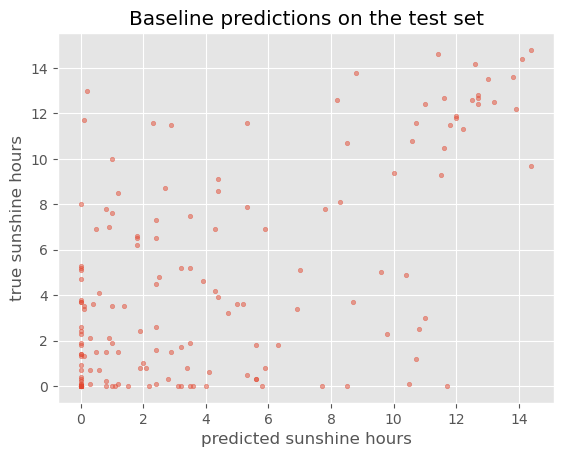

In [27]:
plot_predictions(y_baseline_prediction, y_test,
                 title='Baseline predictions on the test set')

In [28]:
from sklearn.metrics import mean_squared_error
rmse_baseline = mean_squared_error(y_test, y_baseline_prediction, squared=False)
rmse_baseline

3.877323350410224

## Exercise: Baseline
1. Looking at this baseline: Would you consider this a simple or a hard problem to solve?
2. (Optional) Can you think of other baselines?

## 9. Refine the model

In [29]:
model = create_nn()
compile_model(model)

In [30]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=200,
                    validation_data=(X_val, y_val))

Epoch 1/200
24/24 [==============================] - 0s 3ms/step - loss: 17.2755 - root_mean_squared_error: 4.1564 - val_loss: 11.8479 - val_root_mean_squared_error: 3.4421
Epoch 2/200
24/24 [==============================] - 0s 1ms/step - loss: 12.6594 - root_mean_squared_error: 3.5580 - val_loss: 11.4087 - val_root_mean_squared_error: 3.3777
Epoch 3/200
24/24 [==============================] - 0s 1ms/step - loss: 11.4714 - root_mean_squared_error: 3.3869 - val_loss: 12.4494 - val_root_mean_squared_error: 3.5284
Epoch 4/200
24/24 [==============================] - 0s 1ms/step - loss: 11.2202 - root_mean_squared_error: 3.3497 - val_loss: 13.0572 - val_root_mean_squared_error: 3.6135
Epoch 5/200
24/24 [==============================] - 0s 1ms/step - loss: 11.8528 - root_mean_squared_error: 3.4428 - val_loss: 13.2292 - val_root_mean_squared_error: 3.6372
Epoch 6/200
24/24 [==============================] - 0s 1ms/step - loss: 10.8638 - root_mean_squared_error: 3.2960 - val_loss: 12.1646 

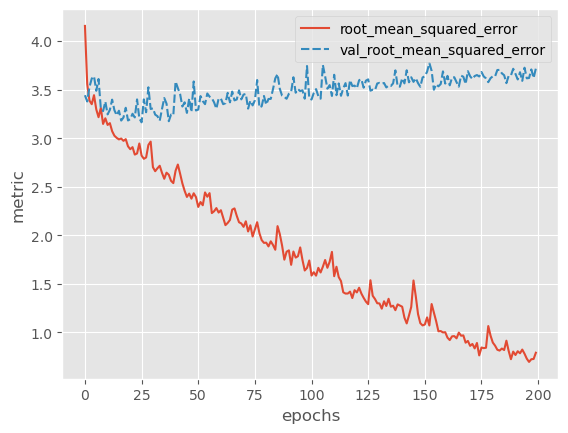

In [32]:
plot_history(history, ['root_mean_squared_error',
                       'val_root_mean_squared_error'])

In [33]:
model.summary()

Model: "weather_prediction_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 89)]              0         
                                                                 
 dense_3 (Dense)             (None, 100)               9000      
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 14101 (55.08 KB)
Trainable params: 14101 (55.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Exercise: (in breakout rooms) Try to reduce the degree of overfitting by lowering the number of parameters
We can keep the network architecture unchanged (2 dense layers + a one-node output layer) and only play with the number of nodes per layer.
Try to lower the number of nodes in one or both of the two dense layers and observe the changes to the training and validation losses.
If time is short: Suggestion is to run one network with only 10 and 5 nodes in the first and second layer.

* Is it possible to get rid of overfitting this way?
* Does the overall performance suffer or does it mostly stay the same?
* (optional) How low can you go with the number of parameters without notable effect on the performance on the validation set?

In [34]:
def create_nn(nodes1=100, nodes2=50):
   # Input layer
   inputs = keras.layers.Input(shape=(X_data.shape[1],), name='input')
   # Dense layers
   layers_dense = keras.layers.Dense(nodes1, 'relu')(inputs)
   layers_dense = keras.layers.Dense(nodes2, 'relu')(layers_dense)
   # Output layer
   outputs = keras.layers.Dense(1)(layers_dense)
   return keras.Model(inputs=inputs, outputs=outputs, name="model_small")

model = create_nn(10, 5)
# Rest of training code

# Or: If you really want to automate things:
for n_neurons in [(10, 5), (20, 10), (5, 5)]:
    model = create_nn(*n_neurons)
    # Train and evaluate
    # Store the different RMSE values



Room 1: Test RMSE: 3.1 layer sizes: 1, 2
Room 2: Test RMSE: 3.0 layer sizes: 5, 5
Room 3: Test RMSE: 3.3 layer sizes: 6, 5, 2

## The big question: How can we have superdeep networks of 100+ layers and still avoid overfitting?

DATA HYGEINE: Keep your training, validation, test set to what they are intended for.

### Early stopping: stop when things are looking best

In [36]:
model = create_nn()
compile_model(model)

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
earlystopper = EarlyStopping(
    monitor='val_loss',
    patience=10 # The number of epochs that the validation 
    # loss does not improve before stopping
)

In [39]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=200,
                    validation_data=(X_val, y_val),
                    callbacks=[earlystopper])

Epoch 1/200
24/24 [==============================] - 0s 3ms/step - loss: 18.8122 - root_mean_squared_error: 4.3373 - val_loss: 12.3406 - val_root_mean_squared_error: 3.5129
Epoch 2/200
24/24 [==============================] - 0s 1ms/step - loss: 13.9903 - root_mean_squared_error: 3.7404 - val_loss: 12.3067 - val_root_mean_squared_error: 3.5081
Epoch 3/200
24/24 [==============================] - 0s 1ms/step - loss: 12.4618 - root_mean_squared_error: 3.5301 - val_loss: 11.3900 - val_root_mean_squared_error: 3.3749
Epoch 4/200
24/24 [==============================] - 0s 2ms/step - loss: 12.6661 - root_mean_squared_error: 3.5589 - val_loss: 12.4106 - val_root_mean_squared_error: 3.5229
Epoch 5/200
24/24 [==============================] - 0s 1ms/step - loss: 12.0716 - root_mean_squared_error: 3.4744 - val_loss: 11.8498 - val_root_mean_squared_error: 3.4424
Epoch 6/200
24/24 [==============================] - 0s 1ms/step - loss: 11.6212 - root_mean_squared_error: 3.4090 - val_loss: 10.7957 

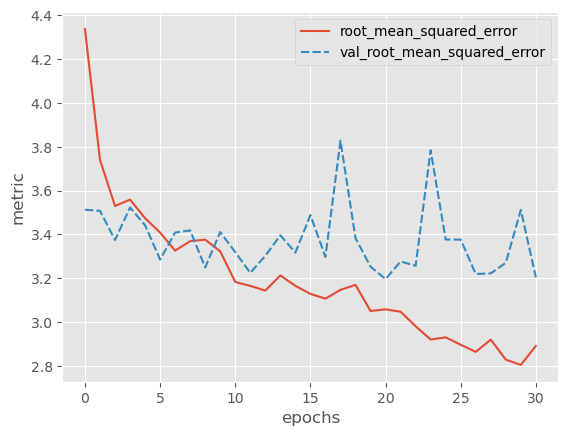

In [41]:
plot_history(history, ['root_mean_squared_error',
                       'val_root_mean_squared_error'])

In [42]:
X_train

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,DE_BILT_cloud_cover,...,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
458,7,0.73,1.0194,0.73,0.00,0.0,11.0,7.8,13.9,6,...,-1.8,-4.0,0.5,0.68,1.0161,1.36,0.46,13.1,9.9,16.3
181,2,0.54,1.0154,3.24,0.00,12.9,18.8,10.4,26.0,3,...,0.9,-2.1,3.8,0.74,1.0134,2.59,0.00,19.9,13.9,25.9
427,7,0.91,0.9929,0.28,1.47,0.0,1.5,0.8,2.5,5,...,-10.3,-15.7,-4.9,0.89,0.9913,0.40,0.52,4.0,1.9,6.0
815,1,0.64,1.0274,2.14,0.00,10.9,3.0,-3.4,9.3,6,...,-14.6,-15.5,-13.6,0.66,1.0277,1.92,0.00,6.4,-0.2,12.9
9,8,0.91,1.0337,0.06,0.09,0.0,2.4,1.4,3.8,3,...,-13.3,-15.0,-11.6,0.94,1.0369,0.58,0.04,1.8,-1.5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,4,0.73,1.0168,1.05,0.00,6.9,10.5,4.0,18.7,6,...,-1.9,-2.7,-1.0,0.83,1.0139,0.75,0.00,12.6,7.4,17.9
763,1,0.67,1.0278,0.94,0.00,8.2,9.4,4.9,14.6,3,...,-4.9,-8.3,-1.4,0.56,1.0199,0.99,0.00,12.4,7.8,16.9
835,7,0.79,1.0163,1.51,0.04,3.1,5.7,2.2,10.4,8,...,-7.3,-10.8,-3.8,0.84,1.0168,1.15,0.26,9.4,5.1,13.7
559,7,0.82,1.0134,1.79,0.09,3.7,17.9,14.4,22.3,6,...,4.0,2.3,5.6,0.89,1.0102,0.99,2.44,16.8,13.0,20.7


In [43]:
def create_nn(nodes1=100, nodes2=50):
   # Input layer
   inputs = keras.layers.Input(shape=(X_data.shape[1],), name='input')
   # Dense layers
   batch_norm = keras.layers.BatchNormalization()(inputs)  # new
   layers_dense = keras.layers.Dense(nodes1, 'relu')(batch_norm)
   layers_dense = keras.layers.Dense(nodes2, 'relu')(layers_dense)
   # Output layer
   outputs = keras.layers.Dense(1)(layers_dense)
   return keras.Model(inputs=inputs, outputs=outputs, name="model_small")

In [44]:
model = create_nn()
compile_model(model)
model.summary()

Model: "model_small"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 89)]              0         
                                                                 
 batch_normalization (Batch  (None, 89)                356       
 Normalization)                                                  
                                                                 
 dense_24 (Dense)            (None, 100)               9000      
                                                                 
 dense_25 (Dense)            (None, 50)                5050      
                                                                 
 dense_26 (Dense)            (None, 1)                 51        
                                                                 
Total params: 14457 (56.47 KB)
Trainable params: 14279 (55.78 KB)
Non-trainable params: 178 (712.00 Byte)
_______________

Epoch 1/200
24/24 [==============================] - 0s 4ms/step - loss: 20.2238 - root_mean_squared_error: 4.4971 - val_loss: 160.4076 - val_root_mean_squared_error: 12.6652
Epoch 2/200
24/24 [==============================] - 0s 1ms/step - loss: 13.7826 - root_mean_squared_error: 3.7125 - val_loss: 77.3127 - val_root_mean_squared_error: 8.7928
Epoch 3/200
24/24 [==============================] - 0s 1ms/step - loss: 11.4702 - root_mean_squared_error: 3.3868 - val_loss: 32.4466 - val_root_mean_squared_error: 5.6962
Epoch 4/200
24/24 [==============================] - 0s 1ms/step - loss: 10.9515 - root_mean_squared_error: 3.3093 - val_loss: 22.6117 - val_root_mean_squared_error: 4.7552
Epoch 5/200
24/24 [==============================] - 0s 1ms/step - loss: 9.6983 - root_mean_squared_error: 3.1142 - val_loss: 21.8591 - val_root_mean_squared_error: 4.6754
Epoch 6/200
24/24 [==============================] - 0s 1ms/step - loss: 10.0076 - root_mean_squared_error: 3.1635 - val_loss: 18.5041

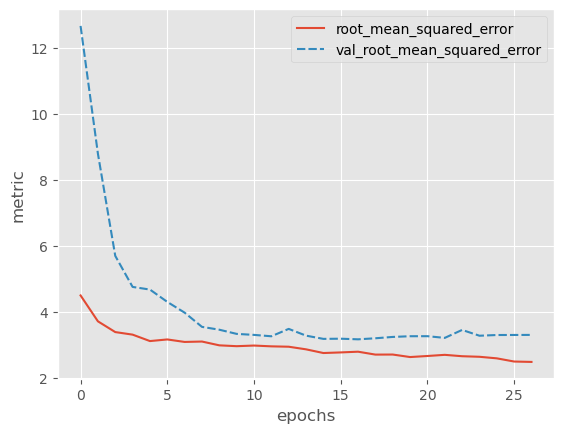

In [45]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=200,
                    validation_data=(X_val, y_val),
                    callbacks=[earlystopper])

plot_history(history, ['root_mean_squared_error', 'val_root_mean_squared_error'])

## Exercise: (in breakout rooms) Simplify the model and add data + next steps
You may have been wondering why we are including weather observations from
multiple cities to predict sunshine hours only in Basel. The weather is
a complex phenomenon with correlations over large distances and time scales,
but what happens if we limit ourselves to only one city?

1. Since we will be reducing the number of features quite significantly,
we should afford to include more data. Instead of using only 3 years, use
8 or 9 years!
2. Remove all cities from the training data that are not for Basel.
You can use something like:
```python
cols = [c for c in X_data.columns if c[:5] == 'BASEL']
X_data = X_data[cols]
```
3. Now rerun the last model we defined which included the BatchNorm layer.
Recreate the scatter plot comparing your prediction with the baseline
prediction based on yesterday's sunshine hours, and compute also the RMSE.
Note that even though we will use many more observations than previously,
the network should still train quickly because we reduce the number of
features (columns).
Is the prediction better compared to what we had before?

4. (Optional) Try to train a model on all years that are available, and all features from all cities. How does it perform?



In [52]:
from tensorflow.keras.callbacks import TensorBoard
import datetime
for n_neurons in [(10, 5), (20, 10), (5, 5)]:
    log_dir = "logs/fit3/" + f'model_{n_neurons[0]}_{n_neurons[1]}' # You can adjust this to add a more meaningful model name
    tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
    model = create_nn(*n_neurons)
    compile_model(model)
    history = model.fit(X_train, y_train,
                       batch_size = 32,
                       epochs = 200,
                       validation_data=(X_val, y_val),
                       callbacks=[tensorboard_callback],
                       verbose = 2)

Epoch 1/200
24/24 - 0s - loss: 34.0302 - root_mean_squared_error: 5.8335 - val_loss: 18.0076 - val_root_mean_squared_error: 4.2435 - 240ms/epoch - 10ms/step
Epoch 2/200
24/24 - 0s - loss: 25.6062 - root_mean_squared_error: 5.0603 - val_loss: 15.4957 - val_root_mean_squared_error: 3.9365 - 45ms/epoch - 2ms/step
Epoch 3/200
24/24 - 0s - loss: 18.9372 - root_mean_squared_error: 4.3517 - val_loss: 18.1780 - val_root_mean_squared_error: 4.2636 - 47ms/epoch - 2ms/step
Epoch 4/200
24/24 - 0s - loss: 16.3197 - root_mean_squared_error: 4.0398 - val_loss: 19.4589 - val_root_mean_squared_error: 4.4112 - 47ms/epoch - 2ms/step
Epoch 5/200
24/24 - 0s - loss: 15.2252 - root_mean_squared_error: 3.9019 - val_loss: 16.1289 - val_root_mean_squared_error: 4.0161 - 49ms/epoch - 2ms/step
Epoch 6/200
24/24 - 0s - loss: 14.2916 - root_mean_squared_error: 3.7804 - val_loss: 14.9064 - val_root_mean_squared_error: 3.8609 - 48ms/epoch - 2ms/step
Epoch 7/200
24/24 - 0s - loss: 13.6499 - root_mean_squared_error: 3.

In [53]:
%load_ext tensorboard
%tensorboard --logdir logs/fit3


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## 10. Save the model


In [54]:
model.save('my_tuned_weather_model')

INFO:tensorflow:Assets written to: my_tuned_weather_model/assets


INFO:tensorflow:Assets written to: my_tuned_weather_model/assets


## BREAK UNTIL 11:40